In [206]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
from utils import *

In [ ]:
video_path='../input-video/test-adios-input.mp4'
frames=read_video(video_path)

In [202]:
keypoint_dict_fr={'BC':[1217,348],'BCC':[965,243],'TCC':[836,197],'TC':[695,160],'LPS':[612,281],
             'TLC':[160,262],'TLPA':[153,282],'BLGP':[103,470],
             'BRC':[1276,240],'BRPA':[1243,228],'BRGP':[1131,192],'TRGP':[1073,175],'TRC':[940,142]}
keypoint_dict_tr={'TLC':[0,0],'TLPA':[0,50],'TLGP':[0,170],'BLGP':[0,230],'BLPA':[0,350],'BLC':[0,400],'LPS':[200,200],
             'TC':[400,0],'TCC':[400,140],'CCC':[400,200],'BCC':[400,260],'BC':[400,400],
             'TRC':[800,0],'TRPA':[800,50],'TRGP':[800,170],'BRGP':[800,230],'BRPA':[800,350],'BRC':[800,400],'RPS':[600,200]}
keypoint_array_fr=np.array([i for _,i in keypoint_dict_fr.items()])
keypoint_array_tr=np.array([keypoint_dict_tr[i] for i in keypoint_dict_fr.keys()])
keypoint4=['TLC','BLGP','TRC','BRC','TC','TCC','BCC','BC']
keypoint_array_fr1=np.array([keypoint_dict_fr[i] for i in keypoint4])
keypoint_array_tr1=np.array([keypoint_dict_tr[i] for i in keypoint4])

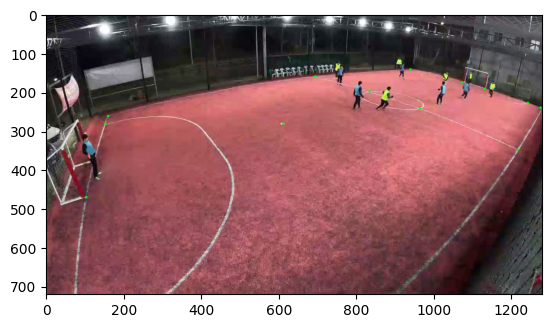

In [187]:
video_path='../input-video/test-adios-input.mp4'
frames=read_video(video_path)
for i,j in keypoint_dict_fr.items():
    cv2.circle(frames[0],
            j,
            3,
            (0,255,0),
            cv2.FILLED)
plt.imshow(cv2.cvtColor(frames[0],cv2.COLOR_BGR2RGB))

In [242]:
frames_rgb=[cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in read_video(video_path)]

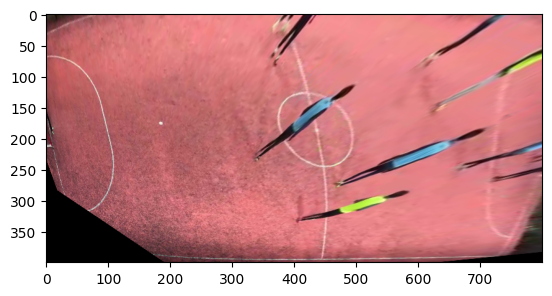

In [243]:
h,status=cv2.findHomography(keypoint_array_fr,keypoint_array_tr)
changed_fr60=cv2.warpPerspective(frames_rgb[60],h,(800,400))
plt.imshow(changed_fr60)

In [213]:
with open('../track-stub/test-stub-v5-1-3.pkl','rb') as load:
    tracks=pickle.load(load)

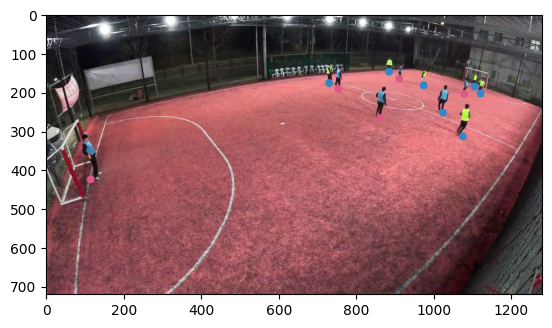

In [238]:
for track_id,values in tracks['players'][60].items():
    x_center,_=get_center_of_bbox(values['bbox'])
    y_under=values['bbox'][-1]
    player_coord=[int(x_center),int(y_under)]
    cv2.circle(frames_rgb[60],player_coord,10,values['team_color'],cv2.FILLED)
plt.imshow(frames_rgb[60])
plt.show()

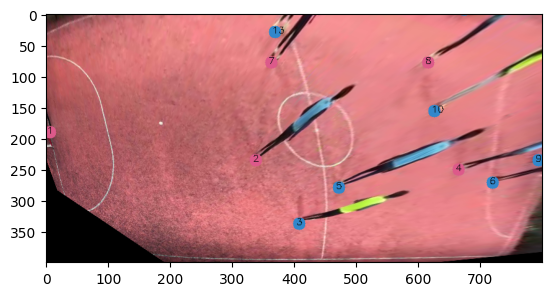

In [244]:
for track_id,values in tracks['players'][60].items():
    x_center,_=get_center_of_bbox(values['bbox'])
    y_under=values['bbox'][-1]
    player_coord=np.array([[[x_center,y_under]]],dtype='float32')
    player_coord_adj=[int(i) for i in cv2.perspectiveTransform(player_coord,h).tolist()[0][0]]
    cv2.circle(changed_fr60,player_coord_adj,10,values['team_color'],cv2.FILLED)
    cv2.putText(changed_fr60,f"{track_id}",[player_coord_adj[0]-5,player_coord_adj[1]+2],cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,0),1)
plt.imshow(changed_fr60)
plt.show()